Module Import

In [1]:
from tensorflow import keras

Load MNIST DataSet


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
for i in range(5):
  print(y_train[i])

5
0
4
1
9


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

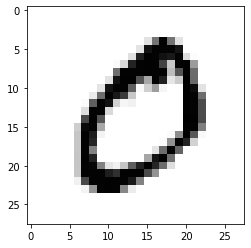

In [ ]:
import matplotlib.pyplot as plt

image_index = 1 # You may select anything up to 60,000

print(x_train[image_index], "\n\n") # The label is 0
print(y_train[image_index], "\n\n")
print(x_test[image_index], "\n\n") # The label is 0
print(y_test[image_index], "\n\n")

print(x_train.shape, x_test.shape, "행렬\n\n")
print(y_train.shape, y_test.shape, "행렬\n\n")


plt.imshow(x_train[image_index], cmap='Greys')



one-hot enconding 수행<br>
5 --> 0 0 0 0 0 1 0 0 0 0<br>
1 --> 0 1 0 0 0 0 0 0 0 0<br>


In [ ]:
y_train = keras.utils.to_categorical(y=y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y=y_test, num_classes=10)

for j in range(5):
  print("=====Y Train Value======", y_train[j], "\n\n")

for k in range(5):
  print("=====Y Test Value======", y_test[k])

=====Y Train Value====== [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 


=====Y Train Value====== [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 


=====Y Train Value====== [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 


=====Y Train Value====== [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 


=====Y Train Value====== [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 


=====Y Test Value====== [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
=====Y Test Value====== [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
=====Y Test Value====== [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=====Y Test Value====== [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
=====Y Test Value====== [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


Reshaping DataSet


In [ ]:
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


모델 생성


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, activation="sigmoid", input_shape=(28*28,)))
model.add(keras.layers.Dense(32, activation="sigmoid"))
model.add(keras.layers.Dense(10, activation="sigmoid"))

모델컴파일

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


모델훈련


In [ ]:
hist=model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2565 - accuracy: 0.9226 - val_loss: 0.2497 - val_accuracy: 0.9246
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2509 - accuracy: 0.9234 - val_loss: 0.2717 - val_accuracy: 0.9152
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2569 - accuracy: 0.9224 - val_loss: 0.2600 - val_accuracy: 0.9206
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2560 - accuracy: 0.9224 - val_loss: 0.2645 - val_accuracy: 0.9213
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.9176 - val_loss: 0.2848 - val_accuracy: 0.9118
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2869 - accuracy: 0.9120 - val_loss: 0.2733 - val_accuracy: 0.9140
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2747 - accuracy: 0.9143 - val_loss: 0.2715 - val_accuracy: 0.9165

모델 평가


In [ ]:
model.evaluate(x_test, y_test )

313/313 [==============================] - 0s 947us/step - loss: 0.2471 - accuracy: 0.9251


[0.24709463119506836, 0.9251000285148621]

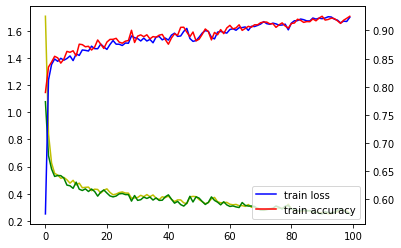

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig, loss_ax =  plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='validation loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='validation accuracy')

plt.legend(['train loss', 'train accuracy', 'validation loss', 'validation accuracy'])
plt.show()